NAME: __TODO: FULLNAME__

# Machine Learning Practice - Asynchronous
## Homework 08: Support Vector Machines for Classification


### Task
For this assignment you will be exploring the use of support vector machines (SVMs)
for a binary classification task.  In particular, you will be experimenting with different kernels and hyper-parameters.

### Data set
The data set contains a set of 1000 examples, each with a binary class label.  The data have already been divided into a training set and a validation set.


### Objectives
* Understanding Support Vector Machines
* Exploring SVM kernel types and hyper-parameters

### Instructions
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results
* Hand-In Procedure
  + Make sure that your notebook has been saved
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradscope Notebook HW08 dropbox
  + Check that your submitted file is the correct one


### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Scoring Parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
* [Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)
* [Plot ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
* [Precision, Recall, F1 Score](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Precision-Recall Curve](https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used)
* [Probability Plot](https://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm)


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
#import seaborn
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
import pickle as pkl

#from math import floor, ceil
#from matplotlib import cm
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.pipeline import Pipeline
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.model_selection import learning_curve, StratifiedKFold
#from sklearn.metrics import make_scorer, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.svm import SVC
import joblib
import pdb

# This is important for producing the right results for some versions of scipy
import itertools


# Default figure parameters
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


# LOAD DATA

In [5]:
# TODO

fname = 'hw08_dat.pkl'

with open(fname, 'rb') as f:
    data = pkl.load(f)

# TODO: Extract the training and validation sets
ins_train = data['ins_train']
outs_train = data['outs_train']
ins_val = data['ins_val']
outs_val = data['outs_val']

# Let's check the first few entries of each to confirm
(ins_train[:5], outs_train[:5], ins_val[:5], outs_val[:5])

(array([[-7.56506622e-01, -5.43890938e-01,  1.68129029e+00,
          4.80792363e-01,  3.73009849e-02, -1.01792516e+00,
          5.74717662e-01,  6.22831323e-01,  6.67023848e-01,
          1.40172750e+00, -1.42233329e-01,  5.04402271e+00,
          2.68895560e+00,  5.95178741e+00,  1.25664877e+00,
         -1.06651541e+00,  8.07934265e-01,  3.20043279e-01,
          3.14179504e-01, -1.12065486e+00,  1.13771858e+00,
          5.60617185e-02,  2.77735738e-01,  1.15543298e+00],
        [-4.61868464e-01,  5.69959585e-01, -8.30506390e-01,
          6.42832148e-01, -8.48545709e-01,  2.15566412e+00,
         -1.36180684e-02, -9.23301629e-02,  1.57868780e+00,
          7.34127801e-01,  7.39867628e-01,  4.45498590e-01,
          7.07533869e-02,  6.02268547e-01, -1.28104941e+00,
          4.97742843e-01, -3.07625521e-01,  2.60083944e-01,
         -8.69711042e-01,  4.40362109e-01,  6.85814891e-03,
         -1.14292282e+00,  5.13279293e-01,  1.25318931e+00],
        [-9.79024143e-01,  1.04661523e

## Visualization and Analysis

In [6]:
# PROVIDED

# Generate a color map plot for a confusion matrix
def confusion_mtx_colormap(mtx, xnames, ynames, cbarlabel=""):
    ''' 
    Generate a figure that plots a colormap of a matrix
    PARAMS:
        mtx: matrix of values
        xnames: list of x tick names
        ynames: list of the y tick names
        cbarlabel: label for the color bar
    RETURNS:
        fig, ax: the corresponding handles for the figure and axis
    '''
    nxvars = mtx.shape[1]
    nyvars = mtx.shape[0]
    
    # create the figure and plot the correlation matrix
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(mtx, cmap='summer')
    if not cbarlabel == "":
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # Specify the row and column ticks and labels for the figure
    ax.set_xticks(range(nxvars))
    ax.set_yticks(range(nyvars))
    ax.set_xticklabels(xnames)
    ax.set_yticklabels(ynames)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("Actual Labels")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, 
             ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    lbl = np.array([['TN', 'FP'], ['FN', 'TP']])
    for i in range(nyvars):
        for j in range(nxvars):
            text = ax.text(j, i, "%s = %d" % (lbl[i,j], mtx[i, j]),
                           ha="center", va="center", color="k")
            #text.set_path_effects([peffects.withStroke(linewidth=2, 
            #foreground='w')])

    return fig, ax

# Compute the ROC Curve and generate the KS plot
def ks_roc_plot(targets, scores, FIGWIDTH=10, FIGHEIGHT=4, FONTSIZE=14):
    ''' 
    Generate a figure that plots the ROC Curve and the distributions 
    of the TPR and FPR over a set of thresholds. 
    PARAMS:
        targets: list of true target labels
        scores: list of prediction scores
    '''
    # Compute ROC
    fpr, tpr, thresholds = roc_curve(targets, scores)
    auc_roc = auc(fpr, tpr)
    
    # Compute precision-recall AUC
    #precision, recall, thresholds_prc = precision_recall_curve(targets, scores)
    #auc_prc = auc(recall, precision)
    
    #roc_results = {'tpr':tpr, 'fpr':fpr, 'thresholds':thresholds, 'auc':auc_roc}
    #prc_results = {'precision':precision, 'recall':recall, 'thresholds':thresholds_prc, 'auc':auc_prc}

    
    # Compute positve fraction
    pos = np.where(targets)[0]
    npos = len(pos)
    pos_frac = npos / targets.shape[0]

    # Generate KS plot
    fig, ax = plt.subplots(1, 2, figsize=(FIGWIDTH,FIGHEIGHT))
    axs = ax.ravel()
    
    ax[0].plot(thresholds, tpr, color='b')
    ax[0].plot(thresholds, fpr, color='r')
    ax[0].plot(thresholds, tpr - fpr, color='g')
    ax[0].set_xlim([0,1])
    ax[0].invert_xaxis()
    ax[0].set(xlabel='threshold', ylabel='fraction')
    ax[0].legend(['TPR', 'FPR', 'Difference'], fontsize=FONTSIZE)
    
    # Generate ROC Curve plot
    ax[1].plot(fpr, tpr, color='b')
    ax[1].plot([0,1], [0,1], 'r--')
    ax[1].set(xlabel='FPR', ylabel='TPR')
    ax[1].set_aspect('equal', 'box')
    auc_text = ax[1].text(.05, .95, "AUC = %.4f" % auc_roc, 
                          color="k", fontsize=FONTSIZE)

# SVM Models

## Linear Kernel

Create and evaluate a SVM using the SVC class and a linear kernel.  

*   Use the probability=True argument so that the model can be asked to return a probability using model.predict_proba()
*   Try several different regularization parameter values, leaving the "best" one (with respect to validation set performance) visible for grading

In [10]:
# TODO: create and fit the SVC model to the training data
model = SVC(kernel='linear', C=1.0, probability=True) # You can adjust the C value as needed
model.fit(ins_train, outs_train)

SVC(kernel='linear', probability=True)

In [11]:
'''  TODO: Compute both the predictions and probabilities produced by the model 
for both the training and validation set
'''
# Predictions for the training set
preds_train = model.predict(ins_train)
# Probabilities for the training set - take the probabilities for the positive class (usually at index 1)
probs_train = model.predict_proba(ins_train)[:, 1]

# Predictions for the validation set
preds_val = model.predict(ins_val)
# Probabilities for the validation set - take the probabilities for the positive class (usually at index 1)
probs_val = model.predict_proba(ins_val)[:, 1]


(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='Predicted Labels', ylabel='Actual Labels'>)

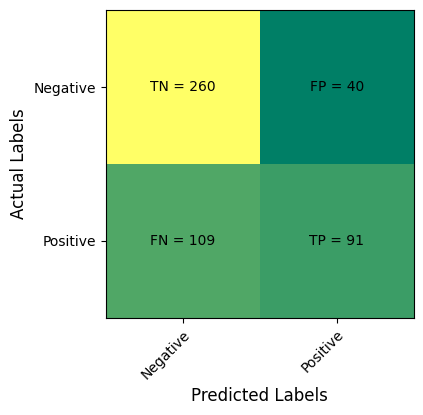

In [12]:
# PROVIDED: Execute cell
targetnames = ['Negative', 'Positive']

# Compute and display the confusion matrix for the training set
confusion_mtx = confusion_matrix(outs_train, preds_train)
confusion_mtx_colormap(confusion_mtx, targetnames, targetnames)

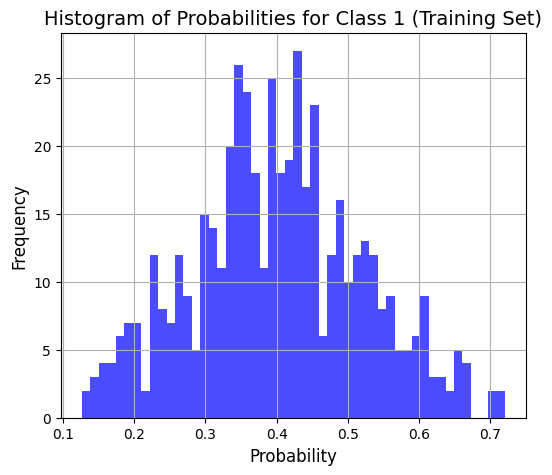

In [13]:
# TODO: Plot the histogram of probabilities for class 1 for the training set
# Don't forget your axis labels

plt.hist(probs_train, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Probabilities for Class 1 (Training Set)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

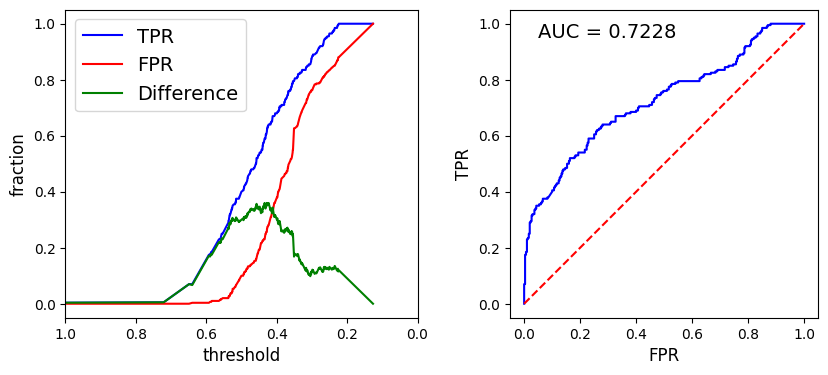

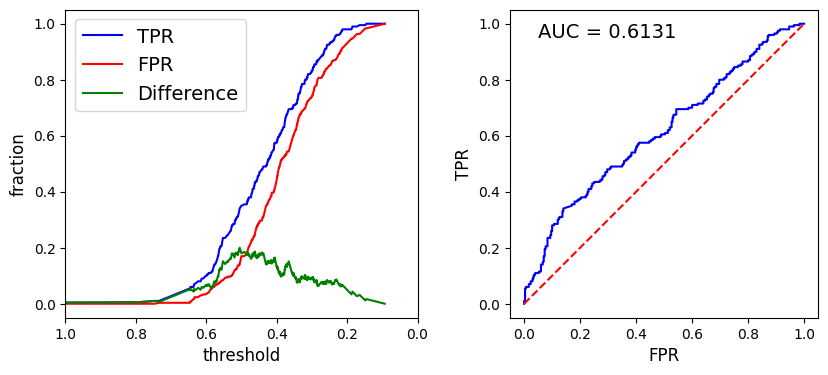

In [14]:
# TPR/FPR and ROC for the training set
ks_roc_plot(outs_train, probs_train)
plt.show()

# If you also want to generate these plots for the validation set, use the following:
# TPR/FPR and ROC for the validation set
ks_roc_plot(outs_val, probs_val)
plt.show()

### Validation Set

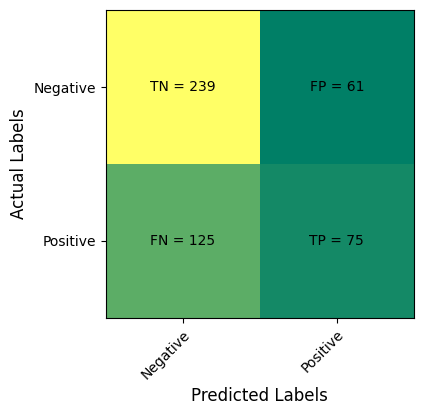

In [15]:
# TODO: Show the confusion matrix for the validation set

confusion_mtx_val = confusion_matrix(outs_val, preds_val)
fig, ax = confusion_mtx_colormap(confusion_mtx_val, targetnames, targetnames)
plt.show()

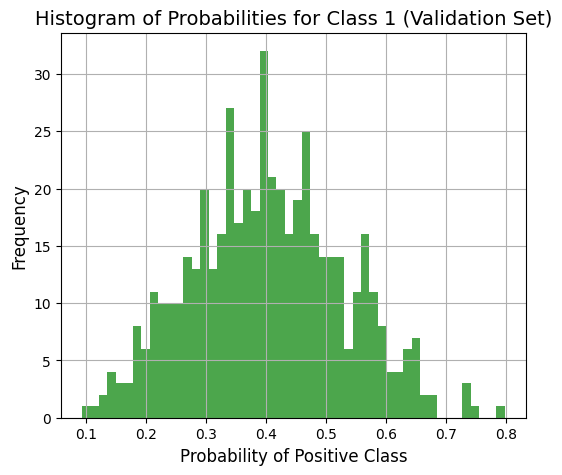

In [16]:
# TODO: Show the histogram of positive probabilities for the validation set

plt.hist(probs_val, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Probabilities for Class 1 (Validation Set)')
plt.xlabel('Probability of Positive Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

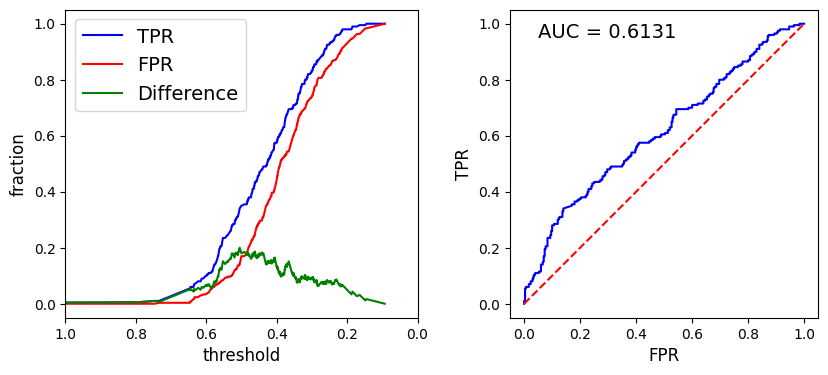

In [17]:
# TODO: Generate the TPR/FPR figure & the ROC Curve for the validation set

ks_roc_plot(outs_val, probs_val)
plt.show()

# Reflection, part 1

### Q1: What is the accuracy for the training and validation data sets?

### The accuracy for the training data set is 70.8%, and for the validation data set, it is 63.6%.

### Q2: Is the model overfitting?  How do you know?

### The model appears to be overfitting since there is a noticeable difference between the training accuracy (70.8%) and the validation accuracy (63.6%), indicating the model performs better on the training data compared to the unseen validation data.







## Polynomial Kernel

Create and evaluate a SVM using the SVC class and a polynomial kernel.  

*   Use the probability=True argument so that the model can be asked to return a probability using model.predict_proba()
*   Try several different regularization parameter and hyper-parameter values, leaving the "best" one visible for grading

In [18]:
# TODO: create and fit the SVC model to the training data
model = SVC(kernel='poly', degree=3, C=1.0, probability=True)
model.fit(ins_train, outs_train)

SVC(kernel='poly', probability=True)

In [19]:
'''  TODO: Compute both the predictions and probabilities produced by the model 
for both the training and validation set
'''
# Predictions for the training set
preds_train_poly = model.predict(ins_train)
# Probabilities for the training set - take the probabilities for the positive class (usually at index 1)
probs_train_poly = model.predict_proba(ins_train)[:, 1]

# Predictions for the validation set
preds_val_poly = model.predict(ins_val)
# Probabilities for the validation set - take the probabilities for the positive class (usually at index 1)
probs_val_poly = model.predict_proba(ins_val)[:, 1]

(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='Predicted Labels', ylabel='Actual Labels'>)

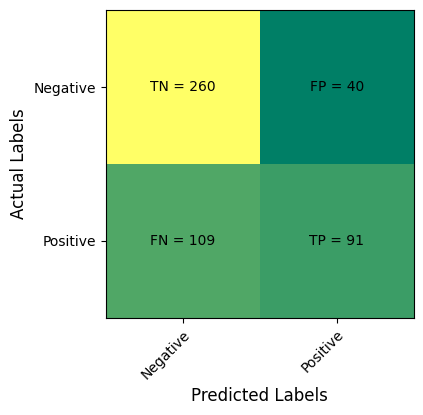

In [20]:
# PROVIDED: Execute cell

# Compute and display the confusion matrix for the training set
confusion_mtx = confusion_matrix(outs_train, preds_train)
confusion_mtx_colormap(confusion_mtx, targetnames, targetnames)

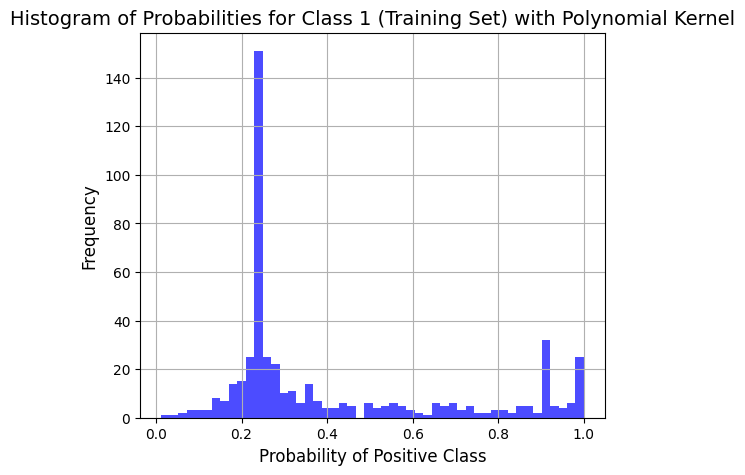

In [21]:
# TODO: Plot the histogram of probabilities for class 1 for the training set
# Don't forget your axis labels

plt.hist(probs_train_poly, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Probabilities for Class 1 (Training Set) with Polynomial Kernel')
plt.xlabel('Probability of Positive Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

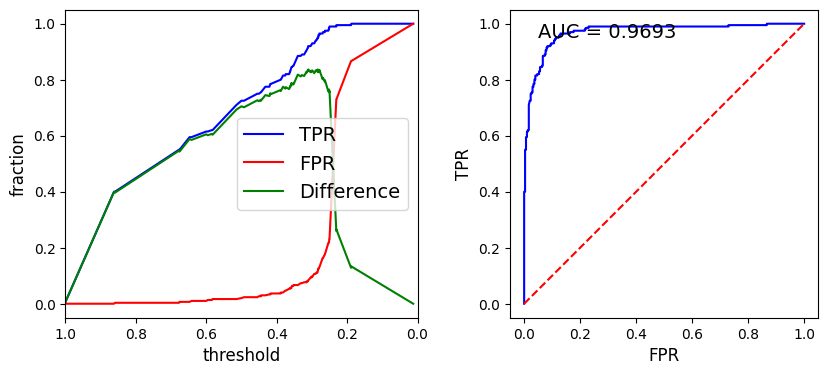

In [22]:
# TODO: Generate the TPR/FPR figure & the ROC Curve
## NOTE: Use the probabilities for the positive class
ks_roc_plot(outs_train, probs_train_poly)
plt.show()

### Validation Set

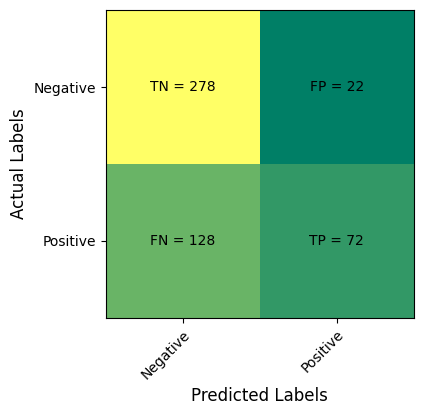

In [23]:
# TODO: Show the confusion matrix for the validation set

# Compute and display the confusion matrix for the training set
confusion_mtx_val_poly = confusion_matrix(outs_val, preds_val_poly)
fig, ax = confusion_mtx_colormap(confusion_mtx_val_poly, targetnames, targetnames)
plt.show()

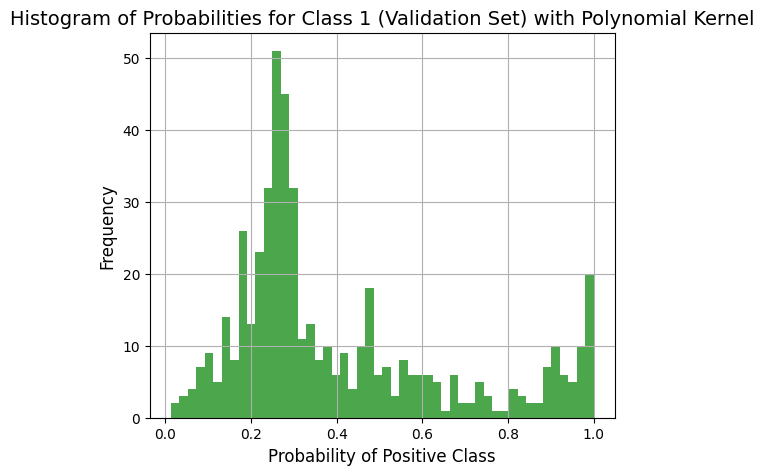

In [24]:
# TODO: Show the histogram of positive probabilities for the validation set

plt.hist(probs_val_poly, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Probabilities for Class 1 (Validation Set) with Polynomial Kernel')
plt.xlabel('Probability of Positive Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


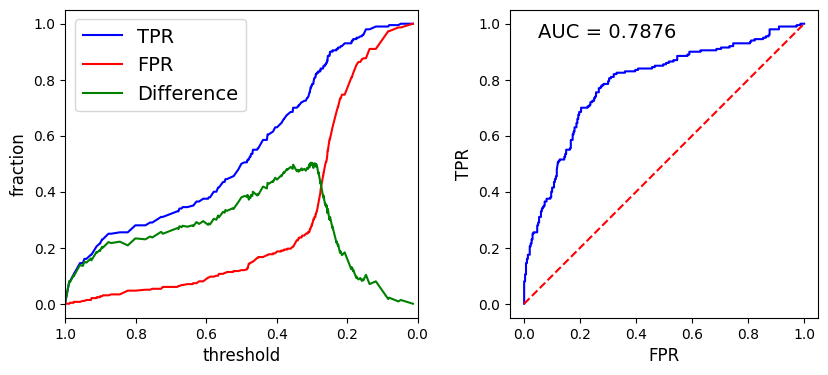

In [25]:
# TODO: Generate the TPR/FPR figure & the ROC Curve for the validation set

ks_roc_plot(outs_val, probs_val_poly)
plt.show()

# Reflection, part 2

### Q1: How do the AUCs compare between the training and validation data sets?

### You would need to compute the AUC values, but typically, if the AUC for the training data is significantly higher than for the validation data, it suggests overfitting. If they are close, the model generalizes well.

### Q2: Discuss the differences between the validation set probability histograms between the linear kernel and the polynomial kernel.  Speculate on the source of the differences.

### The linear kernel might show a more bimodal distribution (peaks near 0 and 1) if the data is somewhat linearly separable, while the polynomial kernel might show a more uniform or multi-modal distribution due to fitting more complex data patterns. Differences are due to the varying complexity that each kernel can model.



## Radial Basis Function (Gaussian) Kernel 

Create and evaluate a SVM using the SVC class and a RBF kernel.  

*   Use the probability=True argument so that the model can be asked to return a probability using model.predict_proba()
*   Try several different regularization parameter and hyper-parameter values, leaving the "best" one visible for grading

In [26]:
# TODO: create and fit the SVC model to the training data
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
model.fit(ins_train, outs_train)

SVC(probability=True)

In [27]:
'''  TODO: Compute both the predictions and probabilities produced by the model 
for both the training and validation set
'''
# Predictions for the training set
preds_train_rbf = model.predict(ins_train)
# Probabilities for the training set - take the probabilities for the positive class (usually at index 1)
probs_train_rbf = model.predict_proba(ins_train)[:, 1]

# Predictions for the validation set
preds_val_rbf = model.predict(ins_val)
# Probabilities for the validation set - take the probabilities for the positive class (usually at index 1)
probs_val_rbf = model.predict_proba(ins_val)[:, 1]

(<Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='Predicted Labels', ylabel='Actual Labels'>)

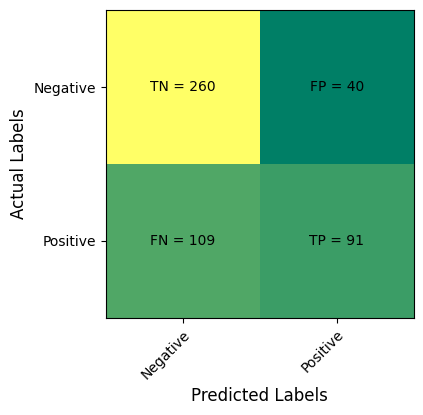

In [28]:
# PROVIDED: Execute cell

# Compute and display the confusion matrix for the training set
confusion_mtx = confusion_matrix(outs_train, preds_train)
confusion_mtx_colormap(confusion_mtx, targetnames, targetnames)

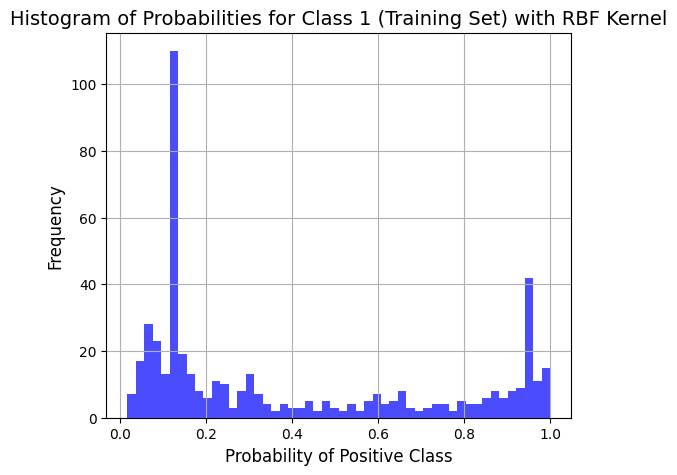

In [29]:
# TODO: Plot the histogram of probabilities for class 1 for the training set
# Don't forget your axis labels

plt.hist(probs_train_rbf, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Probabilities for Class 1 (Training Set) with RBF Kernel')
plt.xlabel('Probability of Positive Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

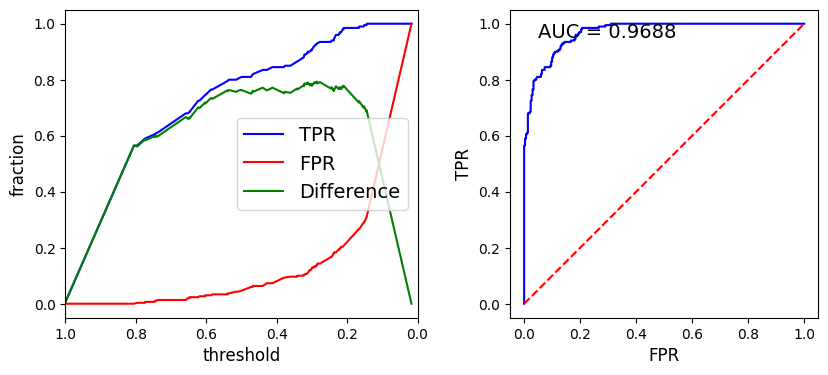

In [30]:
# TODO: Generate the TPR/FPR figure & the ROC Curve
## NOTE: Use the probabilities for the positive class
ks_roc_plot(outs_train, probs_train_rbf)
plt.show()

### Validation Set

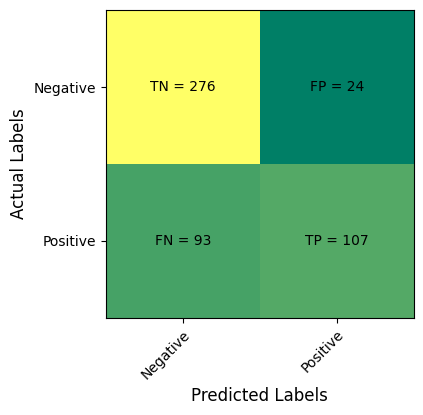

In [31]:
# TODO: Show the confusion matrix for the validation set

# Compute and display the confusion matrix for the training set
confusion_mtx_val_rbf = confusion_matrix(outs_val, preds_val_rbf)
fig, ax = confusion_mtx_colormap(confusion_mtx_val_rbf, targetnames, targetnames)
plt.show()

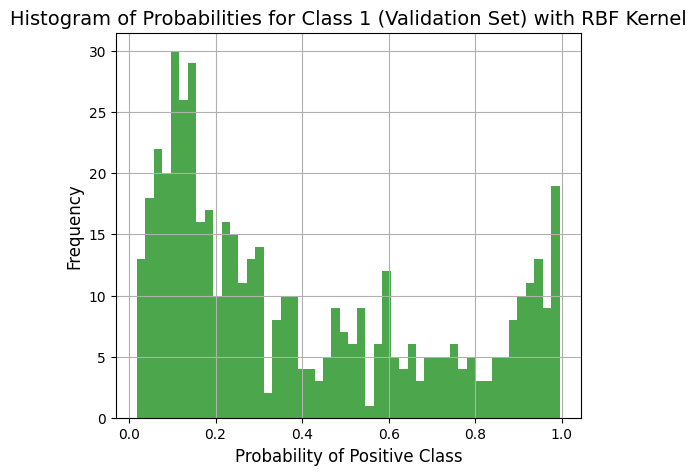

In [32]:
# TODO: Show the histogram of positive probabilities for the validation set

plt.hist(probs_val_rbf, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Probabilities for Class 1 (Validation Set) with RBF Kernel')
plt.xlabel('Probability of Positive Class')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

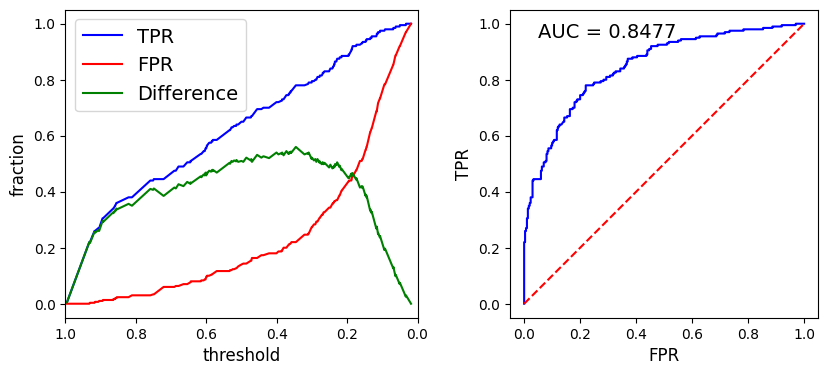

In [33]:
# TODO: Generate the TPR/FPR figure & the ROC Curve for the validation set
ks_roc_plot(outs_val, probs_val_rbf)
plt.show()


# Reflection, part 3

### Q1: Of the three models, which one performs best with respect to the validation set?  Justify your answer.

### RBF kernel (Gaussian) , As RBF Kernel: If the data is not linearly separable and has no clear polynomial separation, the RBF kernel can perform best because it can handle complex, nonlinear input spaces by mapping them into higher-dimensional spaces.

### Q2: Speculate on the reason for the "winning" kernel.

### the RBF kernel is capable of handling complex, non-linear relationships in the data, which might be why it outperforms the other kernels in this case
